##Preprocesamiento y análisis descriptivo / preprocessing

In [105]:
import math
import numpy as np
import pandas as pd
from collections import Counter
import csv
from google.colab import drive
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import os
from sklearn.preprocessing import OneHotEncoder

### **Lectura de datos**

In [49]:
# PREPARA GOOGLE DRIVE
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [50]:
# LECTURA DEL DATASET
ruta = '/gdrive/MyDrive/UNAL_Cobros.csv'
df = pd.read_csv(ruta, sep=";")

In [51]:
nbytes = os.stat(ruta).st_size
megabytes = nbytes / (1024 ** 2)
print(f"El archivo tiene {megabytes:.2f} MB")

El archivo tiene 0.98 MB


In [52]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [53]:
# INFORMACION DE LAS VARIABLES DEL DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7339 entries, 0 to 7338
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CUST_CODE           7339 non-null   float64
 1   NUMERO_FACTURA      7339 non-null   object 
 2   FECHA_ENVIO         7339 non-null   object 
 3   CANTIDAD_FACTURAS   7339 non-null   int64  
 4   FECHA_DEVOLUCION    7339 non-null   object 
 5   IMPORTE_FACTURA     7335 non-null   float64
 6   FECHA_FACTURA       7339 non-null   object 
 7   ESCENARIO_RECOBRO   7339 non-null   object 
 8   DEUDA_TOTAL         7339 non-null   float64
 9   PORTADO             7339 non-null   object 
 10  EMAIL               5144 non-null   object 
 11  EDAD                7087 non-null   object 
 12  FECHA CARGA         7339 non-null   object 
 13  IMPORTE PRODUCTO    7339 non-null   float64
 14  TARGET              7339 non-null   object 
 15  PERMANENCIA         66 non-null     object 
 16  VPT   

In [54]:
# EJEMPLO DE LOS DATOS DEL DATASET
df.head()

,CUST_CODE,NUMERO_FACTURA,FECHA_ENVIO,CANTIDAD_FACTURAS,FECHA_DEVOLUCION,IMPORTE_FACTURA,FECHA_FACTURA,ESCENARIO_RECOBRO,DEUDA_TOTAL,PORTADO,...,PERMANENCIA,VPT,FECHA_BPI,TIPO_DOCUMENTO,CODIGO_POSTAL,NUM_LINEAS_ACTIVAS,ESTADO_CLIENTE,VAP_SCF,VAP_OB,FEU
0,1.845701,A100173400951022,21/12/2022,3,25/10/2022,263.68,01/10/2022,EMP,1000.82,NO,...,NaN,S,202310.0,NaN,8029.0,12,A,N,N,N
1,1.684716,A100173428261022,23/12/2022,3,24/10/2022,3.93,01/10/2022,EMP,23.79,NO,...,NaN,N,NaN,NaN,8039.0,1,A,N,N,N
2,1.750373,A100173814331022,21/12/2022,3,30/11/2022,178.74,01/10/2022,EMP,477.83,NO,...,NaN,N,202310.0,NaN,43850.0,7,A,N,N,N
3,1.845437,A100173855691022,21/12/2022,3,26/10/2022,96.32,01/10/2022,EMP,347.94,NO,...,NaN,S,202310.0,NaN,3340.0,4,A,N,S,N
4,1.807786,A100173883841022,21/12/2022,2,25/10/2022,312.70,01/10/2022,EMP,2684.65,NO,...,NaN,N,202310.0,NaN,3007.0,4,A,N,N,N


In [55]:
# TAMAÑO DEL DATASET
print("Numero de filas: ", df.shape[0])
print("Numero de variables: ", df.shape[1])

Numero de filas:  7339
Numero de variables:  25


### **Transformación de datos**

In [56]:
# ELIMINACION DE COLUMNAS CON INFORMACION NO RELEVANTE
df2 = df.drop(['FECHA_ENVIO', 'CUST_CODE', 'NUMERO_FACTURA',
       'FECHA_DEVOLUCION', 'FECHA_FACTURA',
       'FECHA CARGA', 'EMAIL', 'IMPORTE PRODUCTO'], axis=1)

In [57]:
# COLUMNAS RESULTANTES DESPUES DE LA ELIMINACION
df2.columns

Index(['CANTIDAD_FACTURAS', 'IMPORTE_FACTURA', 'ESCENARIO_RECOBRO',
       'DEUDA_TOTAL', 'PORTADO', 'EDAD', 'TARGET', 'PERMANENCIA', 'VPT',
       'FECHA_BPI', 'TIPO_DOCUMENTO', 'CODIGO_POSTAL', 'NUM_LINEAS_ACTIVAS',
       'ESTADO_CLIENTE', 'VAP_SCF', 'VAP_OB', 'FEU'],
      dtype='object')

In [58]:
# VARIABLE TARGET, CORRESPONDE A COBRANZA SI/NO
df2['TARGET']

0       NO
1       NO
2       SI
3       NO
4       NO
        ..
7334    NO
7335    NO
7336    NO
7337    SI
7338    SI
Name: TARGET, Length: 7339, dtype: object

In [59]:
# CAMBIAR LA VARIABLE TARGET DE TIPO CATEGORICO A NUMERICO BINARIO

df2['TARGET'] = [1 if x=='SI' else 0 for x in df2['TARGET']]

df2['TARGET'][0:5]

0    0
1    0
2    1
3    0
4    0
Name: TARGET, dtype: int64

In [60]:
df2

,CANTIDAD_FACTURAS,IMPORTE_FACTURA,ESCENARIO_RECOBRO,DEUDA_TOTAL,PORTADO,EDAD,TARGET,PERMANENCIA,VPT,FECHA_BPI,TIPO_DOCUMENTO,CODIGO_POSTAL,NUM_LINEAS_ACTIVAS,ESTADO_CLIENTE,VAP_SCF,VAP_OB,FEU
0,3,263.68,EMP,1000.82,NO,NaN,0,NaN,S,202310.0,NaN,8029.0,12,A,N,N,N
1,3,3.93,EMP,23.79,NO,NaN,0,NaN,N,NaN,NaN,8039.0,1,A,N,N,N
2,3,178.74,EMP,477.83,NO,NaN,1,NaN,N,202310.0,NaN,43850.0,7,A,N,N,N
3,3,96.32,EMP,347.94,NO,NaN,0,NaN,S,202310.0,NaN,3340.0,4,A,N,S,N
4,2,312.70,EMP,2684.65,NO,NaN,0,NaN,N,202310.0,NaN,3007.0,4,A,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7334,3,74.20,FU,197.20,NO,51-65,0,NaN,S,202401.0,NaN,48600.0,1,A,N,S,NaN
7335,1,95.31,FU,95.31,NO,51-65,0,NaN,N,NaN,NaN,48600.0,0,B,N,N,NaN
7336,2,55.19,PER,131.77,NO,31-50,0,NaN,N,NaN,TARJETA DE RESIDENCIA,48991.0,2,A,N,N,NaN
7337,1,93.21,FU,93.21,NO,51-65,1,NaN,S,NaN,NaN,48902.0,0,B,N,S,NaN


### **Análisis Exploratorio de datos**

El primer paso en todo proyecto de Deep Learning es **entender** los datos. Esto implica, entre otras, entender las distribuciones, el rango de valores que tienen y si hay o no datos faltantes.

In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7339 entries, 0 to 7338
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CANTIDAD_FACTURAS   7339 non-null   int64  
 1   IMPORTE_FACTURA     7335 non-null   float64
 2   ESCENARIO_RECOBRO   7339 non-null   object 
 3   DEUDA_TOTAL         7339 non-null   float64
 4   PORTADO             7339 non-null   object 
 5   EDAD                7087 non-null   object 
 6   TARGET              7339 non-null   int64  
 7   PERMANENCIA         66 non-null     object 
 8   VPT                 7072 non-null   object 
 9   FECHA_BPI           3168 non-null   float64
 10  TIPO_DOCUMENTO      1680 non-null   object 
 11  CODIGO_POSTAL       7306 non-null   float64
 12  NUM_LINEAS_ACTIVAS  7339 non-null   int64  
 13  ESTADO_CLIENTE      7339 non-null   object 
 14  VAP_SCF             7339 non-null   object 
 15  VAP_OB              7339 non-null   object 
 16  FEU   

In [62]:
#OBTENEMOS LOS VALORES ESTADISTICOS BASICOS DE CADA UNA DE LAS VARIABLES
df2.describe()

,CANTIDAD_FACTURAS,IMPORTE_FACTURA,DEUDA_TOTAL,TARGET,FECHA_BPI,CODIGO_POSTAL,NUM_LINEAS_ACTIVAS
count,7339.000000,7335.000000,7339.000000,7339.000000,3168.000000,7306.000000,7339.000000
mean,1.771495,139.994162,245.237291,0.256711,202348.355429,25316.665754,0.995231
std,0.816146,266.746646,381.796606,0.436848,44.494543,14350.757915,1.843674
min,1.000000,0.000000,0.000000,0.000000,202304.000000,1001.000000,0.000000
25%,1.000000,32.175000,51.670000,0.000000,202311.000000,10195.000000,0.000000
50%,2.000000,71.990000,125.610000,0.000000,202312.000000,28037.000000,1.000000
75%,2.000000,145.080000,282.535000,1.000000,202401.000000,36628.250000,1.000000
max,9.000000,5991.660000,5991.660000,1.000000,202403.000000,52006.000000,91.000000


<Axes: >

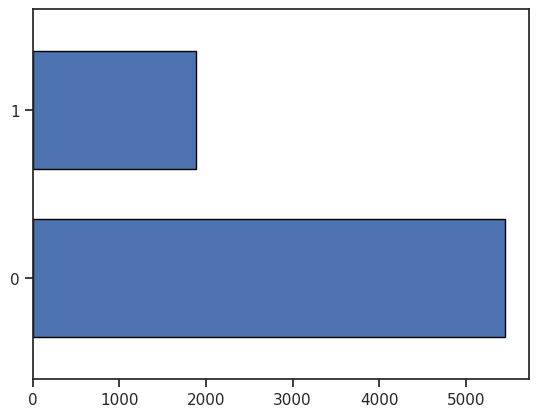

In [63]:
df2["TARGET"].value_counts().plot(kind='barh', width=0.7, edgecolor='black')

<Axes: ylabel='ESTADO_CLIENTE'>

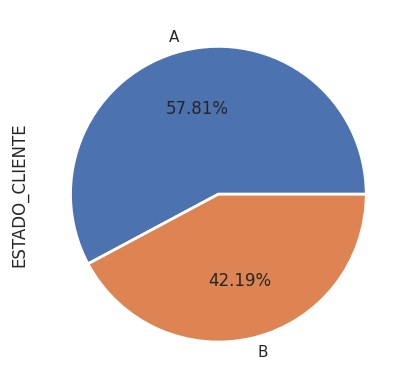

In [64]:
df2["ESTADO_CLIENTE"].value_counts().plot(kind='pie', autopct='%.2f%%', wedgeprops={"linewidth": 2, "edgecolor": "white"})

<Axes: xlabel='CANTIDAD_FACTURAS', ylabel='Count'>

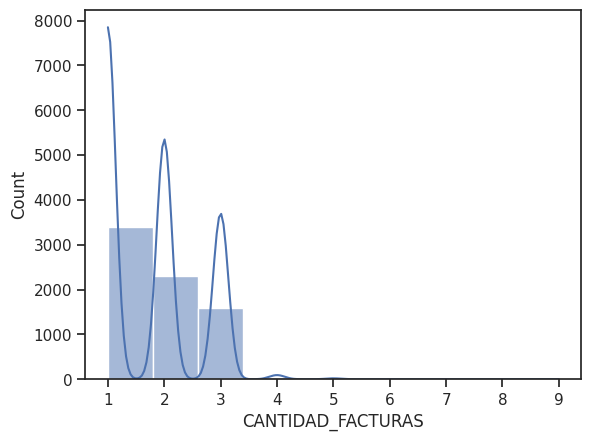

In [65]:
sns.histplot(data=df2, x="CANTIDAD_FACTURAS", bins=10, kde=True)

In [66]:
# ANALISIS DE VARIABLE PERMANENCIA
Counter(df2.PERMANENCIA)

Counter({nan: 7273,
         'Compromiso 18 meses': 58,
         'Compromiso 24 meses': 4,
         'Compromiso 12 meses': 4})

Como la variable PERMANENCIA tiene tantos valores vacios, la variable no sera usada.

In [67]:
# BORRADO DE LA VARIABLE PERMANENCIA
df2.drop("PERMANENCIA", axis=1, inplace=True)

In [68]:
# ANALISIS DE VARIABLE FEU
Counter(df2.FEU)

Counter({'N': 1169, nan: 6169, 'S': 1})

Como la variable FEU tiene tantos valores vacios, la variable no sera usada.

In [69]:
# BORRADO DE LA VARIABLE FEU
df2.drop("FEU", axis=1, inplace=True)

In [70]:
# ANALISIS DE VARIABLE TIPO_DOCUMENTO
Counter(df2.TIPO_DOCUMENTO)

Counter({nan: 5659,
         'NIF': 1294,
         'TARJETA DE RESIDENCIA': 274,
         'CIF': 78,
         'PASAPORTE': 34})

Como la variable TIPO_DOCUMENTO tiene tantos valores vacios, la variable no sera usada.

In [71]:
# BORRADO DE LA VARIABLE TIPO_DOCUMENTO
df2.drop("TIPO_DOCUMENTO", axis=1, inplace=True)

In [72]:
# ANALISIS DE VARIABLE FECHA_BPI
df2.FECHA_BPI

0       202310.0
1            NaN
2       202310.0
3       202310.0
4       202310.0
          ...   
7334    202401.0
7335         NaN
7336         NaN
7337         NaN
7338         NaN
Name: FECHA_BPI, Length: 7339, dtype: float64

En la variable FECHA_BPI los valores diferentes a NaN indican que hay fecha de baja, los valores NaN indica que no.

Por tanto crearemos una nueva variable numerica llamada BAJA así:
<br><br>
Si FECHA_BPI = NaN => BAJA=0<br>
Sino => BAJA=1

In [73]:
# CREAMOS LA VARIABLE BAJA
df2["BAJA"] = [0 if math.isnan(x) else 1 for x in df2['FECHA_BPI']]

In [74]:
df2[["FECHA_BPI","BAJA"]]

,FECHA_BPI,BAJA
0,202310.0,1
1,NaN,0
2,202310.0,1
3,202310.0,1
4,202310.0,1
...,...,...
7334,202401.0,1
7335,NaN,0
7336,NaN,0
7337,NaN,0


In [75]:
# ELIMINAMOS LA VARIABLE FECHA_BPI
df2.drop("FECHA_BPI", axis=1, inplace=True)

In [76]:
# ANALISIS DE LA VARIABLE PORTADO
Counter(df2.PORTADO)

Counter({'NO': 6512,
         'SI': 114,
         'N': 35,
         'N/A ': 379,
         'BAJAS_I ': 273,
         'BAJAS_II ': 26})

In [77]:
# AJUSTE DE LOS DATOS DE PORTADO
df2['PORTADO'] = df2['PORTADO'].map({"NO" : 0,
                                  "SI" : 1,
                                  "N" : 0,
                                  "BAJAS_I " : 0,
                                  "BAJAS_II " : 0,
                                  "N/A " : 0})

In [78]:
# PORTADO DESPUES DE LA TRANSFORMACION
Counter(df2.PORTADO)

Counter({0: 7225, 1: 114})

In [79]:
# ANALISIS DE LA VARIABLE ESCENARIO RECOBROS
Counter(df2.ESCENARIO_RECOBRO)

Counter({'EMP': 1170, 'PER': 4048, 'FU': 2121})

In [80]:
# ANALISIS DE LA VARIABLE ESCENARIO RECOBROS
def escenario(x):
  if x == "PER" or x == "FU":
    return 1
  else:
    return 0

df2["ESCENARIO_RECOBRO"]	= [escenario(x) for x in df2['ESCENARIO_RECOBRO']]

In [81]:
# ESCENARIO RECOBRO DESPUES DEL CAMBIO
Counter(df2.ESCENARIO_RECOBRO)

Counter({0: 1170, 1: 6169})

In [82]:
# ANALISIS DE LA VARIABLE ESTADO_CLIENTE
Counter(df2.ESTADO_CLIENTE)

Counter({'A': 4243, 'B': 3096})

Como la variable ESTADO_CLIENTE tiene solo dos clases usaremos el valor 1 para la clase A y el 0 para la clase B.

In [83]:
# CAMBIAR LA VARIABLE ESTADO_CLIENTE DE TIPO CATEGORICO A NUMERICO BINARIO
df2["ESTADO_CLIENTE"]	= [1 if x == "A" else 0 for x in df2['ESTADO_CLIENTE']]

In [84]:
# TRANFORMACION DE LA VARIABLE VAP_SCF CON VALORES SI Y NO A 1 Y 0
df2["VAP_SCF"]	= [0 if x == "N" else 1 for x in df2["VAP_SCF"]]

In [85]:
# TRANFORMACION DE LA VARIABLE VAP_OB CON VALORES SI Y NO A 1 Y 0
df2["VAP_OB"]	= [0 if x == "N" else 1 for x in df2["VAP_OB"]]

In [86]:
# TRANFORMACION DE LA VARIABLE VPT CON VALORES SI Y NO A 1 Y 0
df2["VPT"]	= [0 if x == "N" else 1 for x in df2["VPT"]]

In [87]:
df2

,CANTIDAD_FACTURAS,IMPORTE_FACTURA,ESCENARIO_RECOBRO,DEUDA_TOTAL,PORTADO,EDAD,TARGET,VPT,CODIGO_POSTAL,NUM_LINEAS_ACTIVAS,ESTADO_CLIENTE,VAP_SCF,VAP_OB,BAJA
0,3,263.68,0,1000.82,0,NaN,0,1,8029.0,12,1,0,0,1
1,3,3.93,0,23.79,0,NaN,0,0,8039.0,1,1,0,0,0
2,3,178.74,0,477.83,0,NaN,1,0,43850.0,7,1,0,0,1
3,3,96.32,0,347.94,0,NaN,0,1,3340.0,4,1,0,1,1
4,2,312.70,0,2684.65,0,NaN,0,0,3007.0,4,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7334,3,74.20,1,197.20,0,51-65,0,1,48600.0,1,1,0,1,1
7335,1,95.31,1,95.31,0,51-65,0,0,48600.0,0,0,0,0,0
7336,2,55.19,1,131.77,0,31-50,0,0,48991.0,2,1,0,0,0
7337,1,93.21,1,93.21,0,51-65,1,1,48902.0,0,0,0,1,0


In [88]:
# TRANSFORMACION DEL CODIGO_POSTAL TOMANDO SOLO EL CODIGO DE LA PROVINCIA
def cp(x):
  if x != "":
    return float(x)//1000
  else:
    return x

df2["CODIGO_POSTAL"] = [cp(x) for x in df2["CODIGO_POSTAL"]]

In [89]:
# CODIGO POSTAL TRANSFORMADO
df2["CODIGO_POSTAL"]

0        8.0
1        8.0
2       43.0
3        3.0
4        3.0
        ... 
7334    48.0
7335    48.0
7336    48.0
7337    48.0
7338    48.0
Name: CODIGO_POSTAL, Length: 7339, dtype: float64

In [90]:
# ANALISIS DE LA VARIABLE EDAD
Counter(df2.EDAD)

Counter({nan: 252, '31-50': 2205, '51-65': 3312, 'MAYOR 65': 835, '0-30': 735})

In [91]:
# IMPUTACION DEL CODIGO_POSTAL
# VAMOS A USAR LA MODA DE ESTA VARIABLE POR SER UNA PROVINCIA

df2.groupby(["CODIGO_POSTAL"])["CODIGO_POSTAL"].count().sort_values(ascending=False).head(10)

# EL VALOR DE LA MODA ES EL CODIGO 28

CODIGO_POSTAL
28.0    1076
8.0      930
46.0     421
3.0      311
41.0     301
29.0     290
35.0     245
38.0     216
11.0     201
30.0     197
Name: CODIGO_POSTAL, dtype: int64

In [92]:
# VAMOS A REMPLAZAR LOS VACIOS EN LAS PROVINCIA CON LA MODA, EL VALOR ES 28
df2["CODIGO_POSTAL"].fillna(value=28, inplace=True)

In [93]:
df2

,CANTIDAD_FACTURAS,IMPORTE_FACTURA,ESCENARIO_RECOBRO,DEUDA_TOTAL,PORTADO,EDAD,TARGET,VPT,CODIGO_POSTAL,NUM_LINEAS_ACTIVAS,ESTADO_CLIENTE,VAP_SCF,VAP_OB,BAJA
0,3,263.68,0,1000.82,0,NaN,0,1,8.0,12,1,0,0,1
1,3,3.93,0,23.79,0,NaN,0,0,8.0,1,1,0,0,0
2,3,178.74,0,477.83,0,NaN,1,0,43.0,7,1,0,0,1
3,3,96.32,0,347.94,0,NaN,0,1,3.0,4,1,0,1,1
4,2,312.70,0,2684.65,0,NaN,0,0,3.0,4,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7334,3,74.20,1,197.20,0,51-65,0,1,48.0,1,1,0,1,1
7335,1,95.31,1,95.31,0,51-65,0,0,48.0,0,0,0,0,0
7336,2,55.19,1,131.77,0,31-50,0,0,48.0,2,1,0,0,0
7337,1,93.21,1,93.21,0,51-65,1,1,48.0,0,0,0,1,0


In [94]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7339 entries, 0 to 7338
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CANTIDAD_FACTURAS   7339 non-null   int64  
 1   IMPORTE_FACTURA     7335 non-null   float64
 2   ESCENARIO_RECOBRO   7339 non-null   int64  
 3   DEUDA_TOTAL         7339 non-null   float64
 4   PORTADO             7339 non-null   int64  
 5   EDAD                7087 non-null   object 
 6   TARGET              7339 non-null   int64  
 7   VPT                 7339 non-null   int64  
 8   CODIGO_POSTAL       7339 non-null   float64
 9   NUM_LINEAS_ACTIVAS  7339 non-null   int64  
 10  ESTADO_CLIENTE      7339 non-null   int64  
 11  VAP_SCF             7339 non-null   int64  
 12  VAP_OB              7339 non-null   int64  
 13  BAJA                7339 non-null   int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 802.8+ KB


In [95]:
# CAMBIO IMPORTE_FACTURA DE CATEGORICO A NUMERICO
df2["IMPORTE_FACTURA"] = df2["IMPORTE_FACTURA"].astype("float")

In [96]:
# IMPUTACION DE VALORES A LAS VARIABLES VACIAS

cols20 = columnas_vacias(df2, 20)
for columna in cols20:
    if df2[columna].dtype == "object":
        df2[columna].fillna(value="NO IDENTIFICADO", inplace=True)
        print(columna, " imputada con NO IDENTIFICADO por tener mas del 20% de vacios")
    else:
        mediana = df2[columna].median(skipna=True)  # numeric_onlybool
        df2[columna].fillna(value=mediana, inplace=True)
        print(columna, " imputada con la mediana por tener mas del 20% de vacios: ", mediana)


cols0 = columnas_vacias(df2, 0)
for columna in cols0:
    if df2[columna].dtype == "object":
        moda = df2[columna].mode()[0]
        df2[columna].fillna(value=moda, inplace=True)
        print(columna, " imputada con la moda por tener entre 0% y 20% de vacios: ", moda)
    else:
        mediana = df[columna].median(skipna=True)  # numeric_onlybool
        df2[columna].fillna(value=mediana, inplace=True)
        print(columna, " imputada con la mediana por tener entre 0% y 20% de vacios: ", mediana)

IMPORTE_FACTURA  imputada con la mediana por tener entre 0% y 20% de vacios:  71.99
EDAD  imputada con la moda por tener entre 0% y 20% de vacios:  51-65


In [97]:
df2

,CANTIDAD_FACTURAS,IMPORTE_FACTURA,ESCENARIO_RECOBRO,DEUDA_TOTAL,PORTADO,EDAD,TARGET,VPT,CODIGO_POSTAL,NUM_LINEAS_ACTIVAS,ESTADO_CLIENTE,VAP_SCF,VAP_OB,BAJA
0,3,263.68,0,1000.82,0,51-65,0,1,8.0,12,1,0,0,1
1,3,3.93,0,23.79,0,51-65,0,0,8.0,1,1,0,0,0
2,3,178.74,0,477.83,0,51-65,1,0,43.0,7,1,0,0,1
3,3,96.32,0,347.94,0,51-65,0,1,3.0,4,1,0,1,1
4,2,312.70,0,2684.65,0,51-65,0,0,3.0,4,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7334,3,74.20,1,197.20,0,51-65,0,1,48.0,1,1,0,1,1
7335,1,95.31,1,95.31,0,51-65,0,0,48.0,0,0,0,0,0
7336,2,55.19,1,131.77,0,31-50,0,0,48.0,2,1,0,0,0
7337,1,93.21,1,93.21,0,51-65,1,1,48.0,0,0,0,1,0


In [98]:
# CALCULO DE LOS BIGOTES PARA VARIABLES

lista_numericas = ["CANTIDAD_FACTURAS", "IMPORTE_FACTURA", "DEUDA_TOTAL", "NUM_LINEAS_ACTIVAS"]

for columna in lista_numericas:
    BI, BS = bigotes(df2[columna])
    print("{}: {:,.2f}, {:,.2f}".format(columna, BI, BS))

CANTIDAD_FACTURAS: 1.00, 3.50
IMPORTE_FACTURA: 0.00, 314.24
DEUDA_TOTAL: 0.00, 628.83
NUM_LINEAS_ACTIVAS: 0.00, 2.50


In [99]:
# AJUSTE DE CANTIDAD_FACTURAS SEGUN EL BIGOTE
df2['CANTIDAD_FACTURAS'] = [1   if x < 1   else x for x in df2['CANTIDAD_FACTURAS']]
df2['CANTIDAD_FACTURAS'] = [3.5 if x > 3.5 else x for x in df2['CANTIDAD_FACTURAS']]

In [100]:
# AJUSTE DE IMPORTE_FACTURA SEGUN EL BIGOTE
df2['IMPORTE_FACTURA'] = [0      if x < 0      else x for x in df2['IMPORTE_FACTURA']]
df2['IMPORTE_FACTURA'] = [314.24 if x > 314.24 else x for x in df2['IMPORTE_FACTURA']]

In [101]:
# AJUSTE DE IMPORTE_FACTURA SEGUN EL BIGOTE
df2['DEUDA_TOTAL'] = [0      if x < 0      else x for x in df2['DEUDA_TOTAL']]
df2['DEUDA_TOTAL'] = [628.83 if x > 628.83 else x for x in df2['DEUDA_TOTAL']]

In [102]:
# AJUSTE DE IMPORTE_FACTURA SEGUN EL BIGOTE
df2['NUM_LINEAS_ACTIVAS'] = [0   if x < 0   else x for x in df2['NUM_LINEAS_ACTIVAS']]
df2['NUM_LINEAS_ACTIVAS'] = [2.5 if x > 2.5 else x for x in df2['NUM_LINEAS_ACTIVAS']]

In [103]:
df2["EDAD"]

0       51-65
1       51-65
2       51-65
3       51-65
4       51-65
        ...  
7334    51-65
7335    51-65
7336    31-50
7337    51-65
7338    51-65
Name: EDAD, Length: 7339, dtype: object

In [106]:
# CREACION DE VARIABLES DUMMIES PARA LA EDAD
modelo_dummy = OneHotEncoder(sparse=False)
df2_dummy = modelo_dummy.fit_transform(pd.DataFrame(df2["EDAD"]))
df2_dummy = pd.DataFrame(df2_dummy, columns=["0_30", "31_50", "51_65", "MAYOR_65"])
df2_dummy

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0_30,31_50,51_65,MAYOR_65
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
7334,0.0,0.0,1.0,0.0
7335,0.0,0.0,1.0,0.0
7336,0.0,1.0,0.0,0.0
7337,0.0,0.0,1.0,0.0


In [107]:
# CONCATENA DATASET NUMERICO CON EL DATASET DE DUMMIES DE LA EDAD
df3 = pd.concat([df2, df2_dummy], axis=1)
df3.sample(20)

# ELIMINA LA VARIABLE EDAD
df3.drop("EDAD", axis=1, inplace=True)

<ipython-input-108-bc20b70975c1>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df3[["CANTIDAD_FACTURAS", "IMPORTE_FACTURA", "DEUDA_TOTAL", "NUM_LINEAS_ACTIVAS"]].hist(ax = axes);


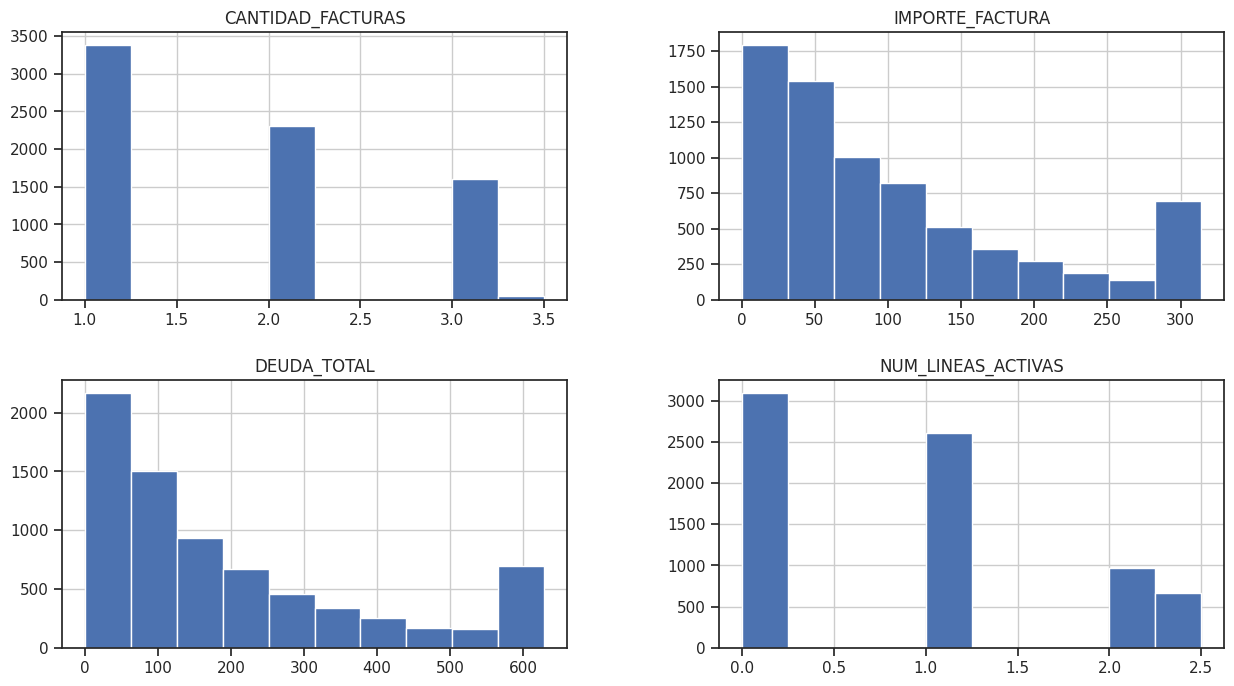

In [108]:
# DISTRIBUCIÓN DE LOS DATOS (HISTOGRAMAS)
fig = plt.figure(figsize = (15,8))
axes = fig.gca()
df3[["CANTIDAD_FACTURAS", "IMPORTE_FACTURA", "DEUDA_TOTAL", "NUM_LINEAS_ACTIVAS"]].hist(ax = axes);

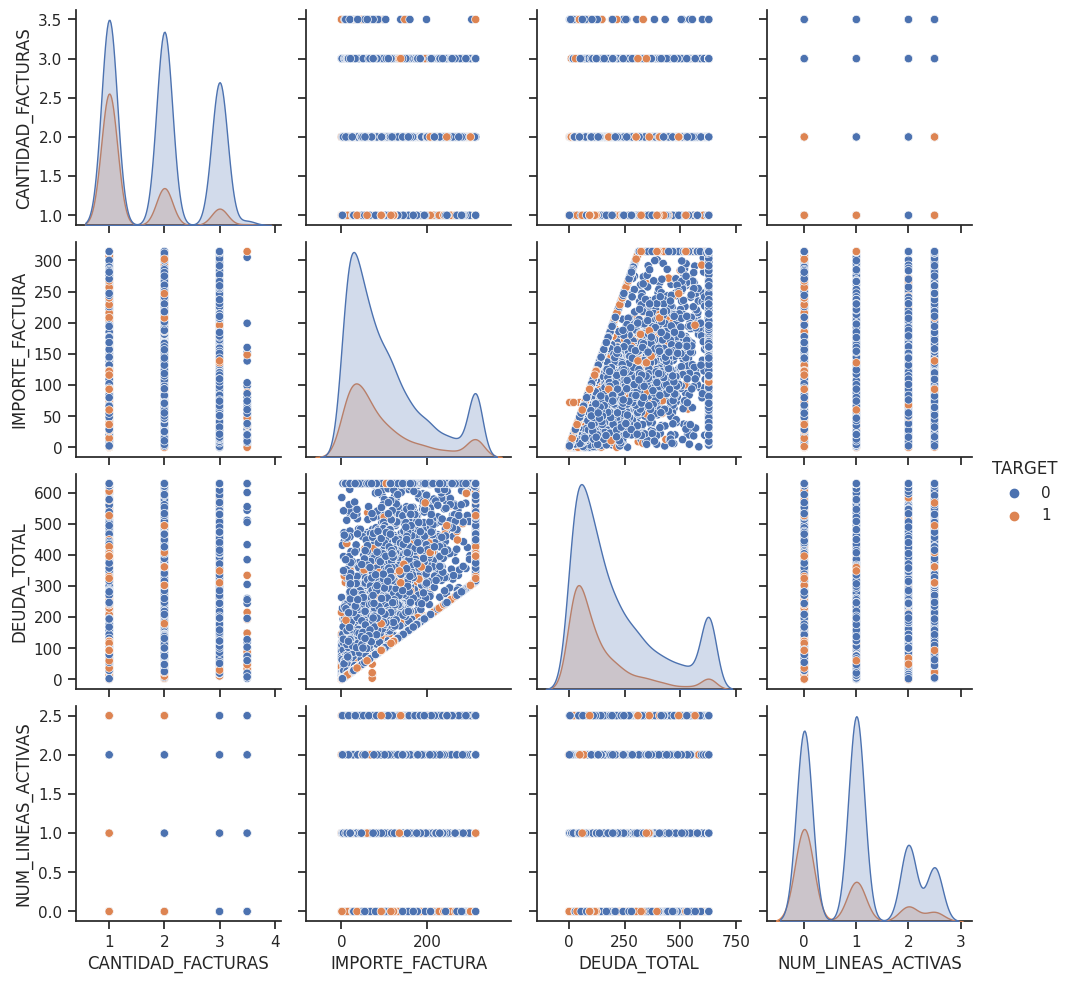

In [109]:
# GRAFICA DE CORRELACION LINEAL ENTRE LAS VARIABLES NUMERICAS

sns.set_theme(style="ticks")

# df = sns.load_dataset("penguins")

lista_numericas = ["CANTIDAD_FACTURAS", "IMPORTE_FACTURA", "DEUDA_TOTAL", "NUM_LINEAS_ACTIVAS", 'TARGET']

sns.pairplot(df3[lista_numericas], hue='TARGET')

<ipython-input-110-9369bc1abeff>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), annot=True, cmap="icefire")


<Axes: >

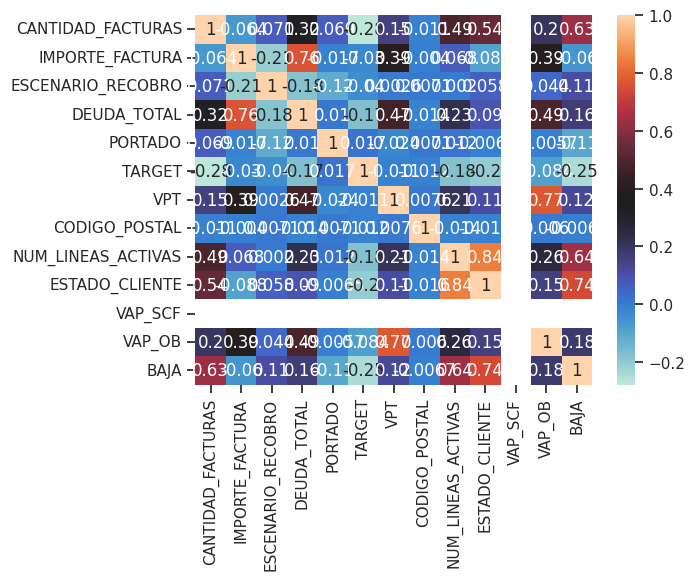

In [110]:
sns.heatmap(df2.corr(), annot=True, cmap="icefire")